<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M3_Image%20Classification/p2_Regional_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODULE 3: IMAGE CLASSIFICATION

Christian Mata, PhD


# PART 2: EXTRACTION OF REGIONAL ATTRIBUTES

Quantitative characterization of an image requires the extraction of relevant regional properties of the image. This process is known as **feature extraction**.

There are several feature extraction apporoaches and in this session we are going to cover the most important ones:

- Basic regional properties: Based on region shape, intensity, color, size, etc.

- Advanced regional properties (texture analysis): Based on statistical properties of the distribution of pixels in the region: Homogeneity, entropy, uniformity, etc.

Let's get started.

# Basic regional properties

Connecting to Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Start from labelled image (segmented regions):
In all regional feature extraction methods we should start from a semgented image with labelled regions or objects in an image:

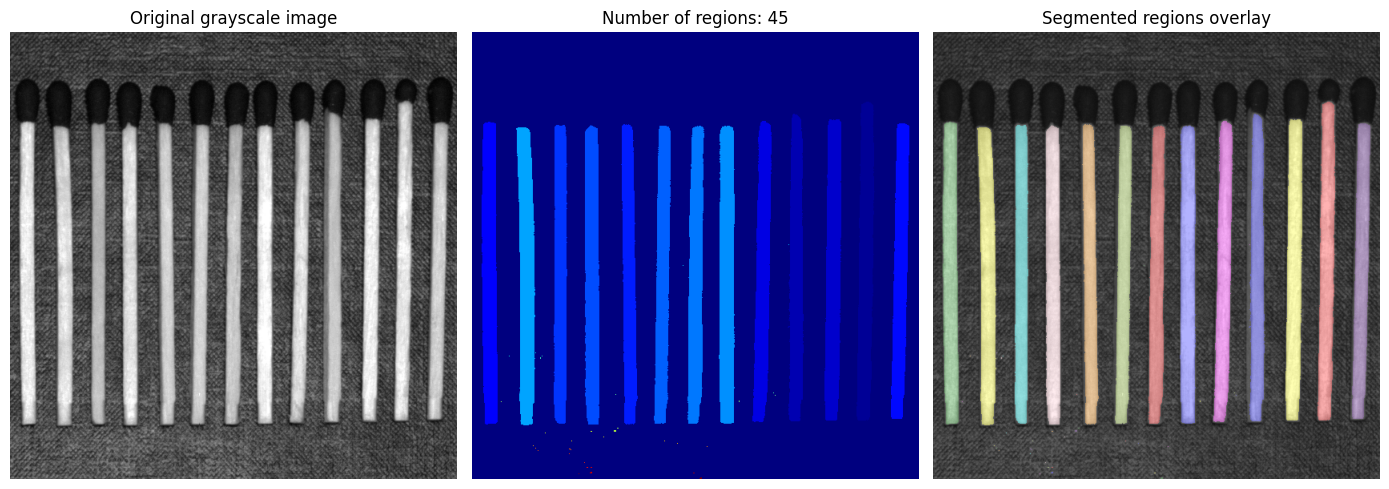

In [ ]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

I = sk.io.imread('/content/drive/MyDrive/UT/TiranaCV2025/matches.tif') # read image using imread function

# If the image is grayscale:
# IG = I
# If the image has a single channel:
IG = I.squeeze()

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 2. Obtain regional properties:

Let's obtain the basic regional properties using the function regionprops:

In [ ]:
from skimage.measure import regionprops
import numpy as np

props = regionprops(label_image)

Let's take a look to some of the available properties: For instance, for the region labelled as region 1 we have the following properties:

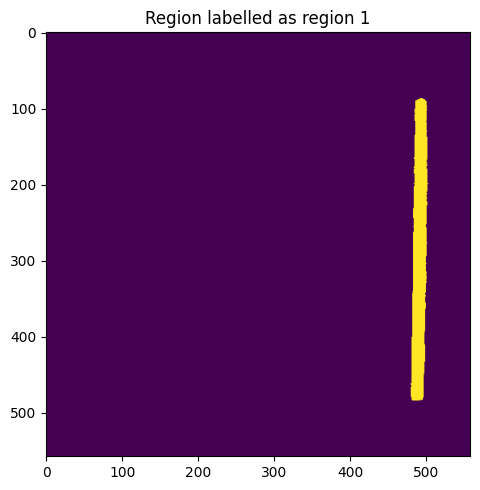

Area of Region 1: 6735.0 pixels
Centroiod of Region 1: (np.float64(287.79346696362285), np.float64(491.1221974758723)) 
Eccentricity of Region 1: 0.9990421943253247
Major Axis Length of Region 1: 450.74131008126204 pixels
Minor Axis Length of Region 1: 19.7231848940344 pixels
Perimeter of Region 1: 849.8650070512055 pixels
Orientation of Region 1: -0.013151214600322376 degrees


In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(label_image==1)
ax.set_title('Region labelled as region 1') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 1: {} pixels'.format(props[0].area))
print('Centroiod of Region 1: {} '.format(props[0].centroid))
print('Eccentricity of Region 1: {}'.format(props[0].eccentricity))
print('Major Axis Length of Region 1: {} pixels'.format(props[0].major_axis_length))
print('Minor Axis Length of Region 1: {} pixels'.format(props[0].minor_axis_length))
print('Perimeter of Region 1: {} pixels'.format(props[0].perimeter))
print('Orientation of Region 1: {} degrees'.format(props[0].orientation))

The complete list of basic properties with a detailed description of their meaning can be found in https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

## 3. Inspection of the regions:

There are clearly too many regions (45), we shoud discard those correspoding to little sporious artefacts in the image. This becomes evident when we print the area itereting over regions. Note that the region number 1 is saved in props[0].

In [ ]:
for ireg in range(0,nregions):
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))

Area of region 1 is = 6735.0 pixels
Area of region 2 is = 5936.0 pixels
Area of region 3 is = 6615.0 pixels
Area of region 4 is = 6184.0 pixels
Area of region 5 is = 6567.0 pixels
Area of region 6 is = 6004.0 pixels
Area of region 7 is = 5687.0 pixels
Area of region 8 is = 5600.0 pixels
Area of region 9 is = 6323.0 pixels
Area of region 10 is = 5827.0 pixels
Area of region 11 is = 6103.0 pixels
Area of region 12 is = 6637.0 pixels
Area of region 13 is = 6629.0 pixels
Area of region 14 is = 1.0 pixels
Area of region 15 is = 1.0 pixels
Area of region 16 is = 1.0 pixels
Area of region 17 is = 1.0 pixels
Area of region 18 is = 1.0 pixels
Area of region 19 is = 2.0 pixels
Area of region 20 is = 1.0 pixels
Area of region 21 is = 1.0 pixels
Area of region 22 is = 1.0 pixels
Area of region 23 is = 2.0 pixels
Area of region 24 is = 1.0 pixels
Area of region 25 is = 2.0 pixels
Area of region 26 is = 6.0 pixels
Area of region 27 is = 2.0 pixels
Area of region 28 is = 1.0 pixels
Area of region 29 

It is obvious that regions with an area of few pixels should be considered as spourious artefacts of the segmentation. A reliable way of inspecting regional features is to represent the histogram of the features:

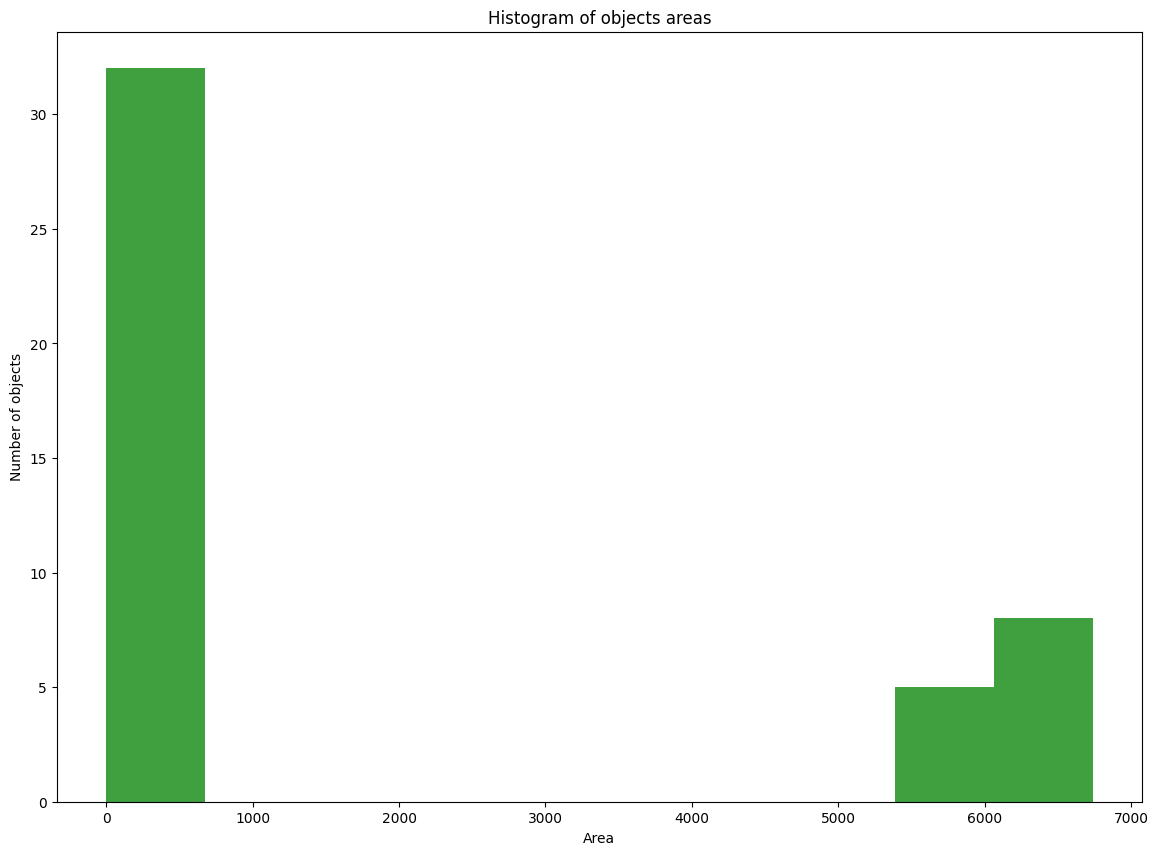

In [ ]:
import numpy as np

area = np.zeros(nregions)
for i in range(0,nregions):
    area[i] = props[i].area

# Plot histogram of the areas
fig = plt.figure(figsize=(14, 10))
n, bins, patches = plt.hist(area, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Area')
plt.ylabel('Number of objects')
plt.title('Histogram of objects areas')
plt.show()

Further inspection reveals that there are indeed around 32 objects with small area 13 with large areas. We now identify which small regions correspond to spourious artefacts presenting small areas below 3000 pixels:

In [ ]:
ind_large = np.where(area > 3000)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} large objects'.format(len(area_large)))
print('Large objects correspond to regions: {}'.format(ind_lregions))
print('The areas of the large objects are: {}'.format(area_large))

ind_small = np.where(area < 3000)
area_small = area[ind_small]
ind_sregions = np.array(ind_small)+1
print('There are {} small objects'.format(len(area_small)))
print('Small objects correspond to regions: {}'.format(ind_sregions))
print('The areas of the small objects are {}'.format(area_small))

There are 13 large objects
Large objects correspond to regions: [[ 1  2  3  4  5  6  7  8  9 10 11 12 13]]
The areas of the large objects are: [6735. 5936. 6615. 6184. 6567. 6004. 5687. 5600. 6323. 5827. 6103. 6637.
 6629.]
There are 32 small objects
Small objects correspond to regions: [[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
  38 39 40 41 42 43 44 45]]
The areas of the small objects are [1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 6. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 1. 2. 2. 5. 2. 1. 5.]


For instance, region labelled as 14 and its corresporing properties looks like this:

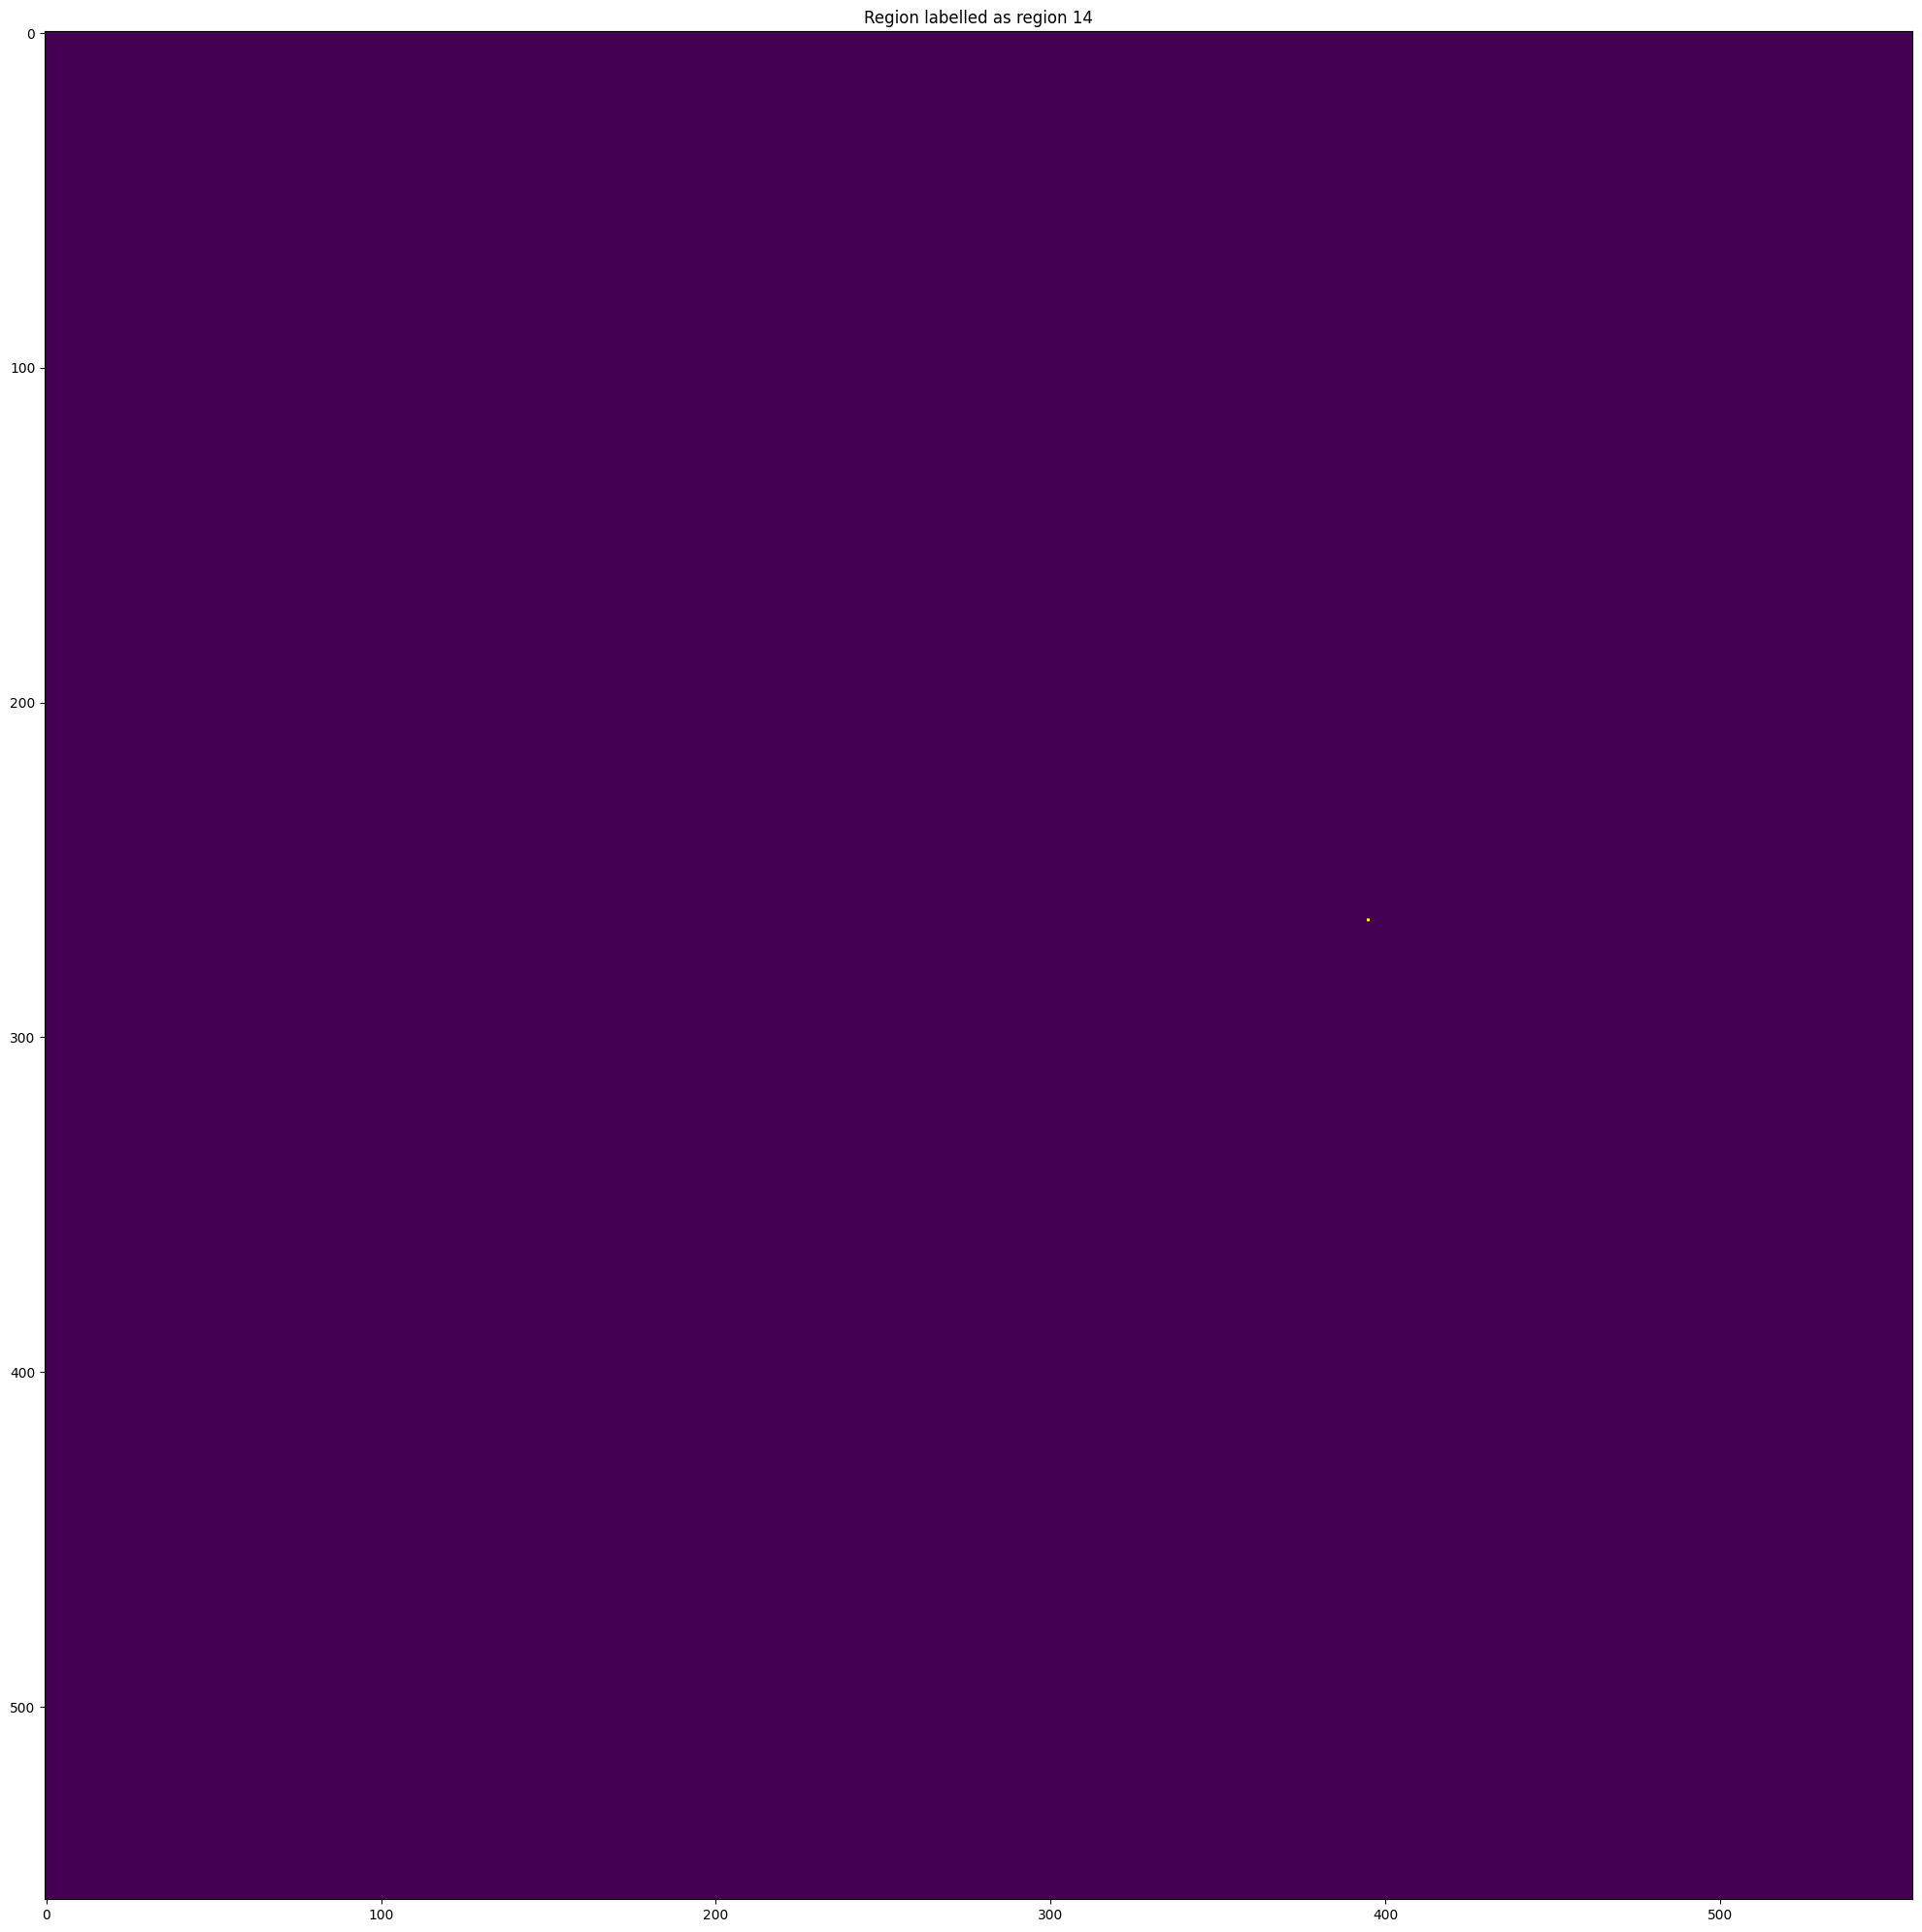

Area of Region 14: 1.0 pixels
Centroiod of Region 14: (np.float64(265.0), np.float64(395.0)) 
Eccentricity of Region 14: 0
Major Axis Length of Region 14: 0.0 pixels
Minor Axis Length of Region 14: 0.0 pixels
Perimeter of Region 14: 0.0 pixels
Orientation of Region 14: -0.7853981633974483 degrees


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(label_image==14)
ax.set_title('Region labelled as region 14') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 14: {} pixels'.format(props[13].area))
print('Centroiod of Region 14: {} '.format(props[13].centroid))
print('Eccentricity of Region 14: {}'.format(props[13].eccentricity))
print('Major Axis Length of Region 14: {} pixels'.format(props[13].major_axis_length))
print('Minor Axis Length of Region 14: {} pixels'.format(props[13].minor_axis_length))
print('Perimeter of Region 14: {} pixels'.format(props[13].perimeter))
print('Orientation of Region 14: {} degrees'.format(props[13].orientation))

## 4. Removal of spourious regions:

Let's remove small objects from the labelled image so that we can work only with relevant objects in the image:

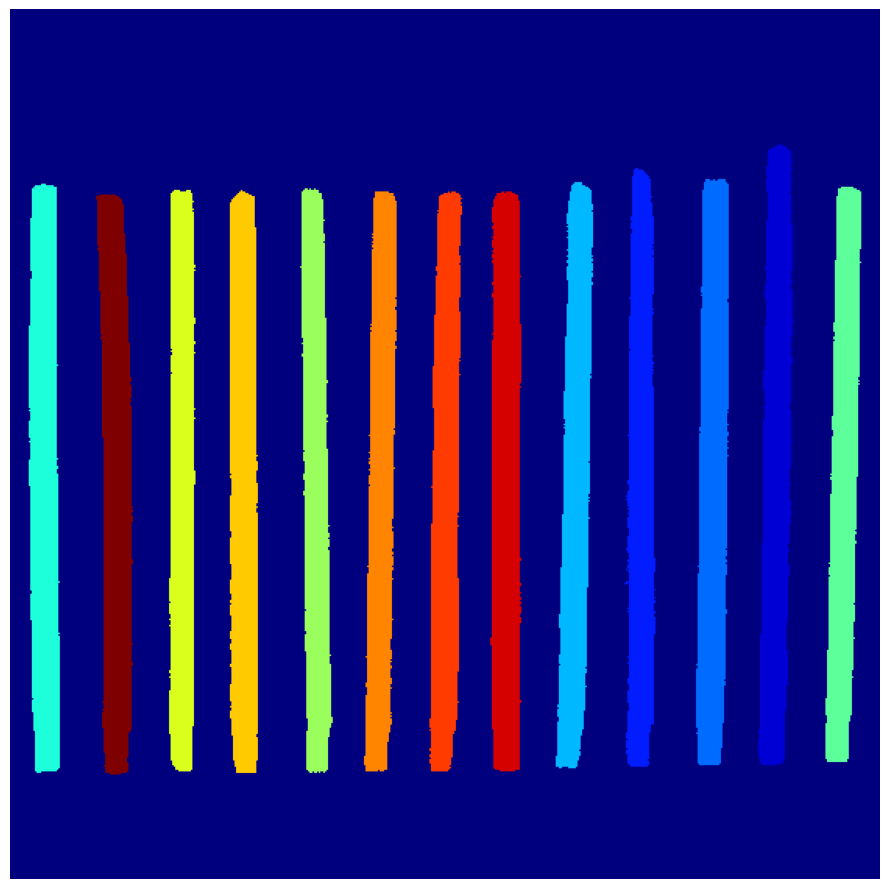

In [ ]:
for i in np.squeeze(ind_small): # loop over small (spourious) regions
    iregion = i+1
    label_image[label_image==iregion]=0 # set spourious region as background by re-labelling as zero

image_label_overlay = label2rgb(label_image, image=IG) # generate again the colormap assignment

fig, ax = plt.subplots(figsize=(14, 9))
ax.imshow(label_image,cmap=plt.cm.jet)
ax.set_axis_off()
plt.tight_layout()
plt.show()

## 5. Obtain final region properties:
Represent the **centroid and bounding box** of each object in the image:

The number of final regions is 13


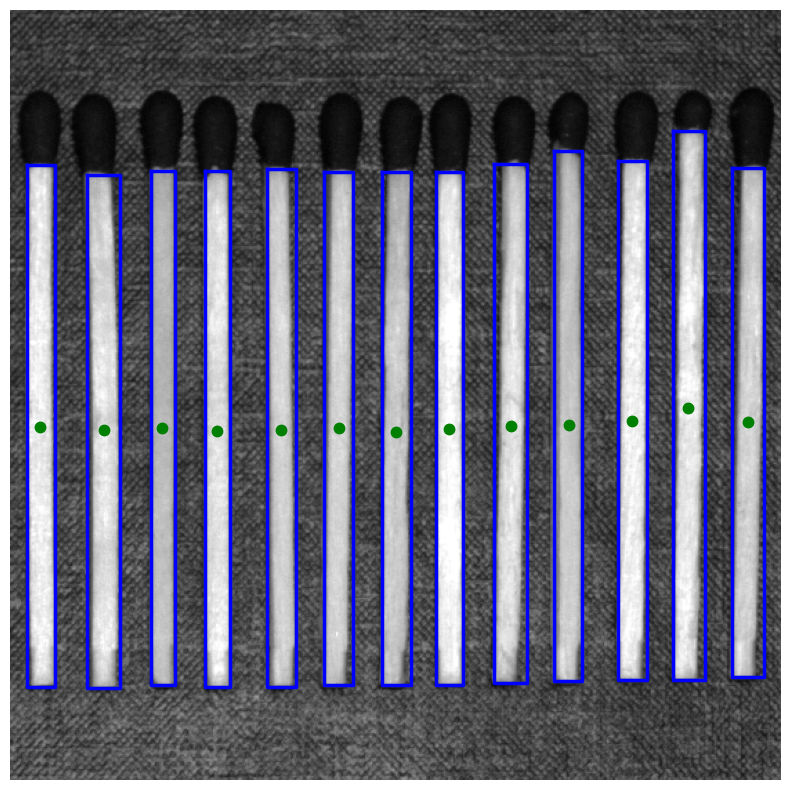

In [ ]:
from skimage.measure import regionprops
import math

props = regionprops(label_image) # Obain again the properties after removal of spourious regions
print('The number of final regions is {}'.format(len(props)))

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(IG, cmap=plt.cm.gray)

for p in props:
    y0, x0 = p.centroid
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.set_axis_off()
plt.show()

# 2. Texture-based regional properties

Understanding the gray-level co-ocurrence matrix:

Each component of the co-ocurrence matrix g[i,j,d,theta] represents the number of times that grey-level j occurs at a distance d and at an angle theta from grey-level i:

In [ ]:
from skimage.feature.texture import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
g = graycomatrix(image, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))


[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 3
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


Once we have the GLCM we can compute the different texture properties:

Compute a feature of a grey level co-occurrence matrix to serve as a compact summary of the matrix. The properties are computed as follows:

- 'contrast': $\sum_{i,j=0}^{levels-1} P_{i,j}(i-j)^2$

- 'dissimilarity': $\sum_{i,j=0}^{levels-1}P_{i,j}|i-j|$

- 'homogeneity': $\sum_{i,j=0}^{levels-1}\frac{P_{i,j}}{1+(i-j)^2}$

- 'ASM': $\sum_{i,j=0}^{levels-1} P_{i,j}^2$

- 'energy':$\sqrt{ASM}$

- 'correlation': $\sum_{i,j=0}^{levels-1} P_{i,j}\left[\frac{(i-\mu_i) (j-\mu_j)}{\sqrt{(\sigma_i^2)(\sigma_j^2)}}\right]$

   

Implement our custom GLCM to obtain the gray-level co-occurrence matrix of each region in the image. Moreover, a fucntion to obtain the Texture Feature Calculation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import data, img_as_ubyte

# Assume that `label_image` and `IG` are already defined
# IG should be a grayscale image of type uint8
# label_image is the label map of regions

props = regionprops(label_image,intensity_image=IG) # Obtain again the properties after removal of spourious regions

nregions = len(props)

iregion = 0
props_texture = np.zeros((nregions,5))
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    g = graycomatrix(I, [1], [0], levels=None, normed=True, symmetric=True)
    contrast = graycoprops(g, 'contrast')
    dissimilarity = graycoprops(g, 'dissimilarity')
    homogeneity = graycoprops(g, 'homogeneity')
    energy = graycoprops(g, 'energy')
    correlation = graycoprops(g, 'correlation')

    props_texture[iregion,0] = contrast
    props_texture[iregion,1] = dissimilarity
    props_texture[iregion,2] = homogeneity
    props_texture[iregion,3] = energy
    props_texture[iregion,4] = correlation

    iregion = iregion + 1

# Export to Excel file
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

<ipython-input-36-4eb79c3879ac>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,0] = contrast
<ipython-input-36-4eb79c3879ac>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,1] = dissimilarity
<ipython-input-36-4eb79c3879ac>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,2] = homogeneity
<ipython-input-36-4eb79c3879ac>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,193.105465,10.836491,0.094759,0.018133,0.929850
1,345.012533,12.844386,0.111022,0.021629,0.956752
2,333.493460,12.857270,0.102070,0.015937,0.955309
3,327.672222,12.236667,0.113407,0.018564,0.960499
4,128.309947,9.120292,0.102557,0.024563,0.696337
5,188.529773,10.965028,0.086201,0.020034,0.704618
6,307.925770,12.667558,0.098066,0.016163,0.960275
7,154.689753,9.001581,0.141326,0.024024,0.955489
8,284.106643,12.393506,0.092209,0.016595,0.962103
9,337.488897,13.076884,0.108817,0.024348,0.958346


# Part 3: Advanced statistical features: Shannon's entropy:

**Shannon's entropy and information of a signal**

In physics, entropy is a measure of the disorder of a system:

Boltzmann's entropy equation $S = k_B \log W$ where $k_B = 1.3807 \times 10^{-23}$ J/K is the Boltzmann's constant and $W$ is the number of dynamical configutations of a physical system (positions and velocities of the particles in a gas, for instance).


Shannon's entropy:

In computer science we can extend the concept of entropy by defining a set of states ${a_0,a_1,\dots,a_n}$ with a probability of occurence in a certain message given by ${p_0,p_1,\dots,p_n}$.

In the case of a digital image, the states will correspond to grayscale levels of a pixel in an image and therefore ina n-bit grayscale image we have ${a_0,a_1,\dots,a_n} = {0,1,\dots,2^n-1}$. The histogram of the image will tell us the probability of each intensity levels ${p_0,p_1,\dots,p_n}$.

Shannon's entroy is defined as:

### $H = -\sum_{i=1}^n p_i \log_2(p_i)$ (bits)


Let's consider some cases as examples:


- **Image with a constant histogram**: Equal probability of occurrence of all intensity levels ${p_0=1/n,p_1=1/n,p_2=1/n,p_3=1/n \dots,p_n=1/n}$ and therefore the maximum possible Shannon's entropy $H=n$ bits. Such image can not be compressed and n bits are required in order to represent the intensity levels of the image.


- **Binary image with half of the pixels with an intensity level of 0 and half with an intensity level of 1:** In this case we have a histogram ${p_0=0.5,p_1=0.5,p_2=0,p_3=0\dots,p_n=0}$. This image will have a Shannon's entropy of $H=1$ bits since only 1 bit is required to represent the intensity levels of the pixels.


- **Binary image of N pixels with all pixels with an intensity level of 0 except one pixel with an intensity level of 1:** In this case we have a histogram ${p_0=(N-1)/N,p_1=1/N,p_2=0,p_3=0\dots,p_n=0}$. This image will have a Shannon's entropy of $H\sim 0$ bits because we need much less than 1 bit to represent the intensity levels of the pixels (most of them are zero anyway).

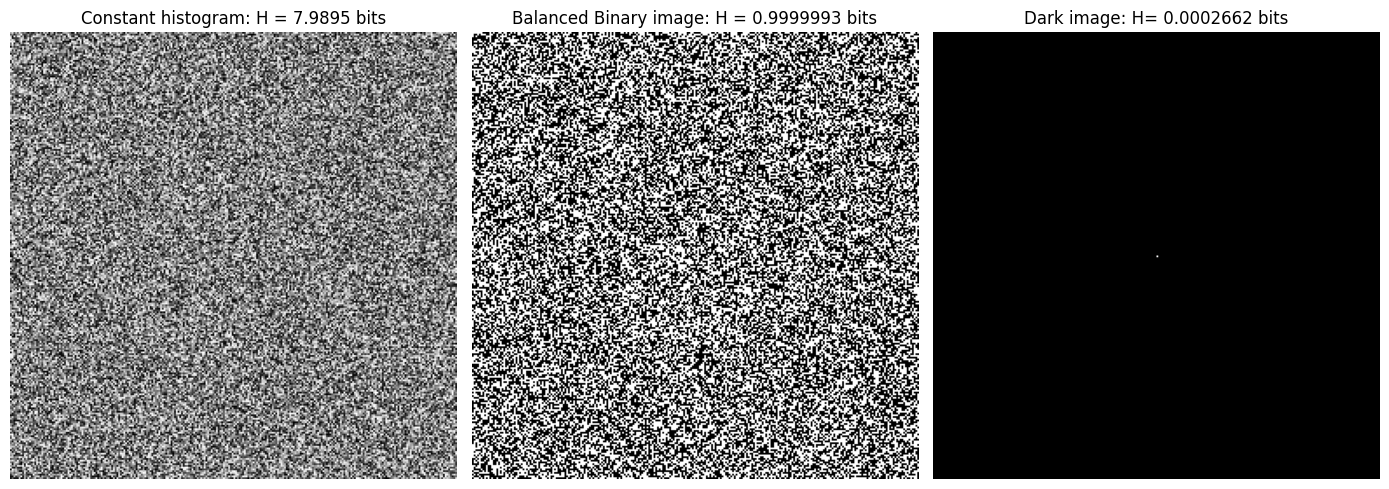

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Image with constant histogram:
I1 = np.random.randint(256,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I1.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H1 = -np.sum(probg * np.log2(probg), axis=0)

# 2. Binary image with half of the pixels 0 and half 1:
I2 = np.random.randint(2,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I2.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H2 = -np.sum(probg * np.log2(probg), axis=0)

# 3. Binary image with half of the pixels 0 and half 1:
I3 = np.zeros((256,256))
I3[128,128]=1
# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I3.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H3 = -np.sum(probg * np.log2(probg), axis=0)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I1,cmap=plt.cm.gray)
ax[0].set_title('Constant histogram: H = {0:1.4f} bits'.format(H1))
ax[1].imshow(I2,cmap=plt.cm.gray)
ax[1].set_title('Balanced Binary image: H = {0:1.7f} bits'.format(H2))
ax[2].imshow(I3,cmap=plt.cm.gray)
ax[2].set_title('Dark image: H= {0:1.7f} bits'.format(H3))

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()


## Entropy of regions:

Compute entropy of the different objects in the previous segmentation example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iregion = 0
entropy = np.zeros(nregions)
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    v = I.flatten() # Flatten image as row vector:
    # Probability of ocurrence of each grayscale level
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
    H = -np.sum(probg * np.log2(probg), axis=0) # Compute Shannon's entropy
    entropy[iregion] = H
    iregion = iregion + 1

print('Entropy of the objects: {}'.format(entropy))

Entropy of the objects: [6.77833323 7.22831516 7.31315294 7.21579365 5.85416573 6.17071811
 7.2732025  6.90732055 7.2652201  7.25602906 7.25264207 7.241117
 6.16331812]


## Comparing texture features and Shannon's entropy:

Comparing the contrast (obtained from the co-ocurrence matrix) and the Shannon's entropy,
we observe that regions with a smaller contrast present a decrease in the Shannon's entroppy and therefore can be easily compressed by encoding their pixels with a lower number of bits.

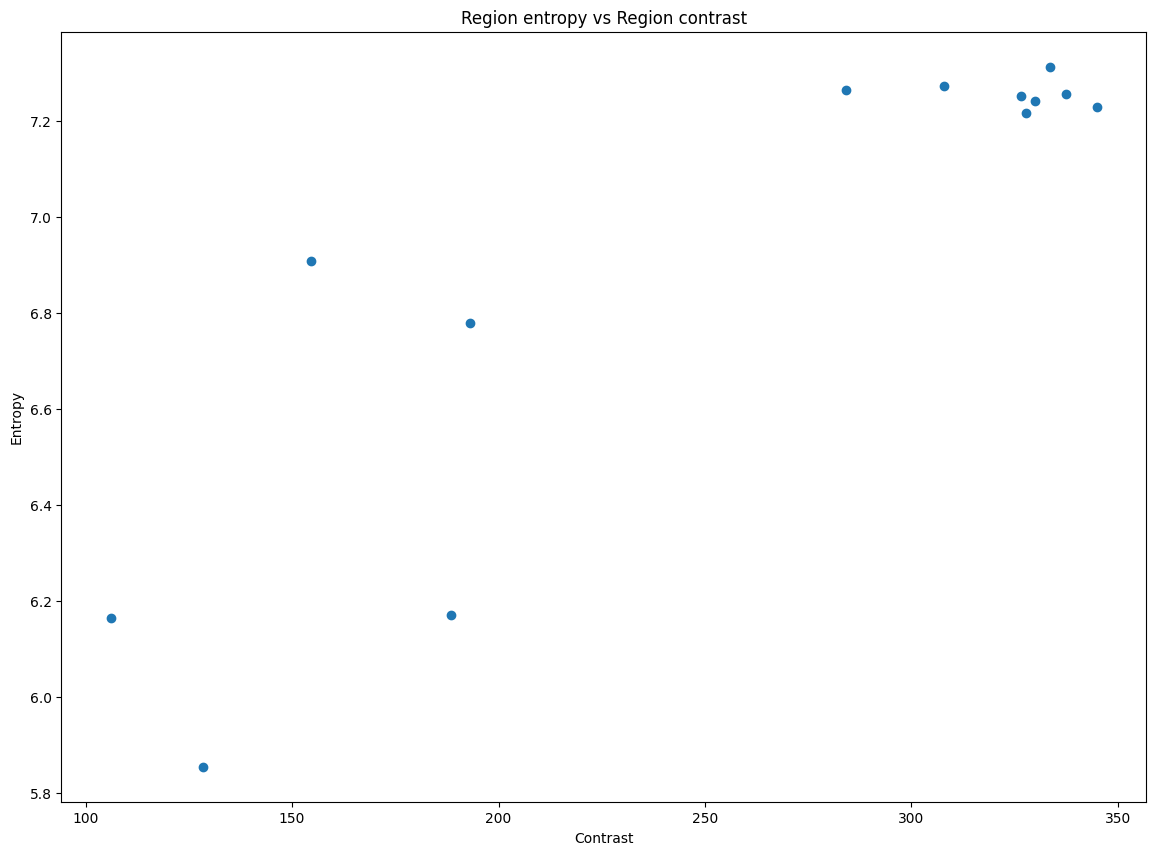

In [ ]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(props_texture[:,0], entropy)
plt.ylabel('Entropy')
plt.xlabel('Contrast')
plt.title("Region entropy vs Region contrast")
plt.show()

# Comparing the entropy of famous paintings

Degas:
Shannon =7.2025601787032265
Entropy = 7.202560178703537
Shannon entropy=7.2025601787032265 bits/pixel
Seurat:
Shannon =7.419448652343173
Entropy = 7.41944865234343
Shannon entropy=7.419448652343173 bits/pixel
Monet:
Shannon =6.994113887409718
Entropy = 6.994106822057794
Shannon entropy=6.994113887409718 bits/pixel
Van Gogh:
Shannon =7.35018096317303
Entropy = 7.350180963173285
Shannon entropy=7.35018096317303 bits/pixel
Maximum Entropy = 8.0 bits/pixel


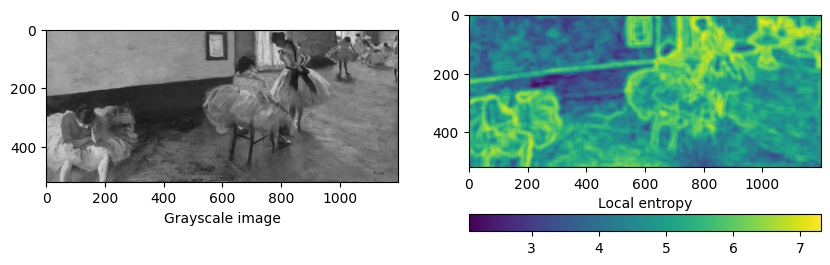

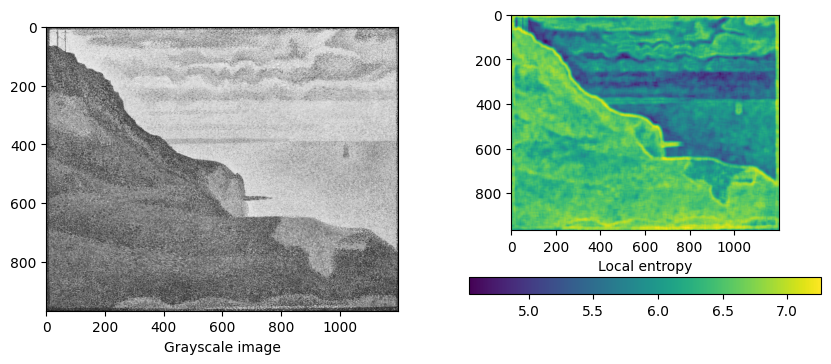

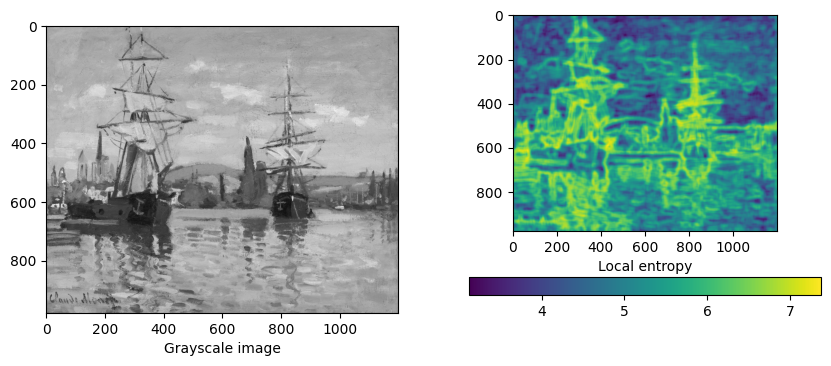

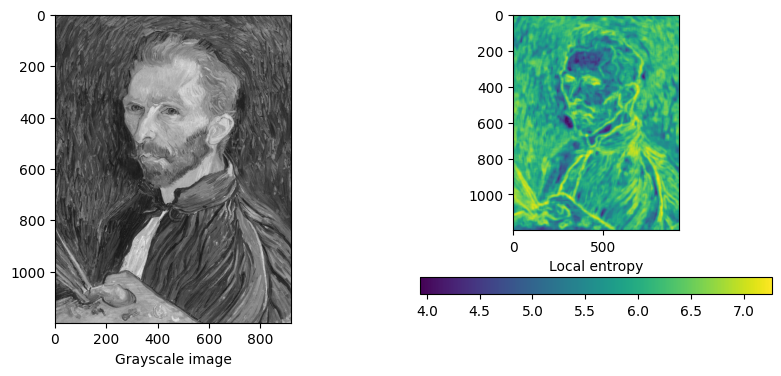

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.measure import shannon_entropy
import skimage as sk

def entropy_image(imgG):

    img = img_as_ubyte(imgG) # convert to uint8

# Local entropy in a certain pixel neiborhood:
    entr_img = entropy(img, np.ones((21,21)))
    shannon_img = shannon_entropy(img)
    print('Shannon ={}'.format(shannon_img))
# Flatten the image (convert from matrix to vector):
    v = img.flatten()
# For each grayscale leve, get the pixel probability of occurrence:
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
# Compute Shannon's entropy:
    H_noise = -np.sum(probg * np.log2(probg), axis=0)
# Compare:
    print('Entropy = {}'.format(H_noise))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax1.imshow(img, cmap='gray')
    ax1.set_xlabel("Grayscale image")
    h1 = ax2.imshow(entr_img, cmap='viridis')
    ax2.set_xlabel("Local entropy")
    fig.colorbar(h1,ax=ax2,orientation='horizontal') # visualize colorbar
    return entr_img,shannon_img

# Open access images downloaded with permission from:
# https://images.nga.gov

print('Degas:')
imgC = sk.io.imread('/content/drive/MyDrive/UT/TiranaCV2025/degas.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Seurat:')
imgC = sk.io.imread('/content/drive/MyDrive/UT/TiranaCV2025/seurat.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Monet:')
imgC = sk.io.imread('/content/drive/MyDrive/UT/TiranaCV2025/monet.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Van Gogh:')
imgC = sk.io.imread('/content/drive/MyDrive/UT/TiranaCV2025/vangogh.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

# Maximum entropy: An image with equal probabilities for each grayscale level:
nsymbols = np.power(2,8)
prob_equal = (1/nsymbols)*np.ones(nsymbols)
H_max = -np.sum(prob_equal * np.log2(prob_equal), axis=0)
print('Maximum Entropy = {} bits/pixel'.format(H_max))